<img src = '../Images/BMWBanner.jpg' width = 850/>

# <div align="center"> Automating the Start of an Automobile Startup: <br>Predicting the Price of a Car Based on its Features 

## Abstract
This notebook seeks to explore which variables impact the price of a car, and to build a model to accurately reflect and predict car prices. The notebook will explore the dataset through data examination and visualization, clean the dataset, engineer features, and utilize recursive feature elimination to determine appropriate features for a linear regression model. It will then explore and evaluate simple and multiple linear regression models before refining and evaluating a multiple linear regression model that appropriately fits the data. This will be explored both statistically and visually.

In summary, the resulting multiple linear regression model's equation to determine a car's price is:
<br><i><b>price</b> = 0.7246 + (0.4871 * curb-weight) - (0.3230 * aspiration_std) + (0.4062 * fuel-system_mpfi) - (0.3168 * make-quality_Budget) <br>+ (1.3541 * make-quality_Premium) - (0.5915 * num-of-cylinders_four)</i>
    
This model will account for 85.1% of the variance in the data while maintaining a low mean squared error of 0.149 with all variables being statistically significant.
    

## Introduction & Research Question
A new automotive startup has been founded with the goal of securing a sustainable market share in the United States' car market. The startup's focus is on conventional gasoline-powered vehicles rather than on battery or more environmentally-conscious fuel sources in an effort to keep costs lower. 

Recognizing the competition faced by many established US, European, and Asian car manufacturers, it is critically important to this startup's survival to understand the pricing models of their competition. As such, the startup's leadership team has asked a consulting team to explore the features of a vehicle that impact its price in the US market.

In this scenario, we will be the consulting team, which is tasked with answering the research questions below.

### Research Questions
Specifically, the leadership team wants to know:
* What features most significantly impact the price of a car in the US market?
* From those given features, how specifically do they impact the price of a car?
    
By answering those questions, the startup can more effectively plan their vehicles so that they are priced appropriately in the US auto market. With this information, they can modify the builds of their vehicles so that they remain within their targeted price goal. Moreover, they can further analyze the cost-revenue dynamics to improve their odds of profitability.


### Dataset & Tools

The dataset we will be using is hosted on Kaggle, and can be downloaded [here](https://www.kaggle.com/statsakash/used-car-price-prediction) as AutomobileEDA.csv. 

Instead of downloading the csv from Kaggle, you can use the code below to pull the data from a url and save it to the Data folder previously created. This is the same dataset, but stored on IBM's Cloud Storage for retrieval. 

The dataset appears to have been originally sourced from the University of California, Irvine's (UCI) Machine Learning Repository. If you wish to source it from UCI's website, you can find the dataset [here](https://archive.ics.uci.edu/ml/datasets/automobile). An important note: there are discrepancies, as the dataset we are using resolved a few null values in this original dataset from UCI. Therefore, this isn't advised, as your results will differ due to these discrepancies.

To begin, we will need to import the tools below and pull the dataset.

In [1]:
# Import needed tools and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
# url path of data 
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

# Data Retrieval
data = pd.read_csv(url)

# Save to Data Folder as auto_data.csv
data.to_csv(r'~/Github/DATA601_MidtermProject/Data/auto_data.csv', index = None)

## Exploratory Data Analysis

Now that we have saved the dataset to the designated folder, let's explore it further.

In [375]:
# Create dataframe
df = pd.read_csv(r'~/Github/DATA601_MidtermProject/Data/auto_data.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [376]:
# Look at stats of the data
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [377]:
# Check the number of unique values
df.nunique(axis = 0)

symboling              6
normalized-losses     51
make                  22
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  39
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
city-L/100km          29
horsepower-binned      3
diesel                 2
gas                    2
dtype: int64

Text(0, 0.5, 'Count')

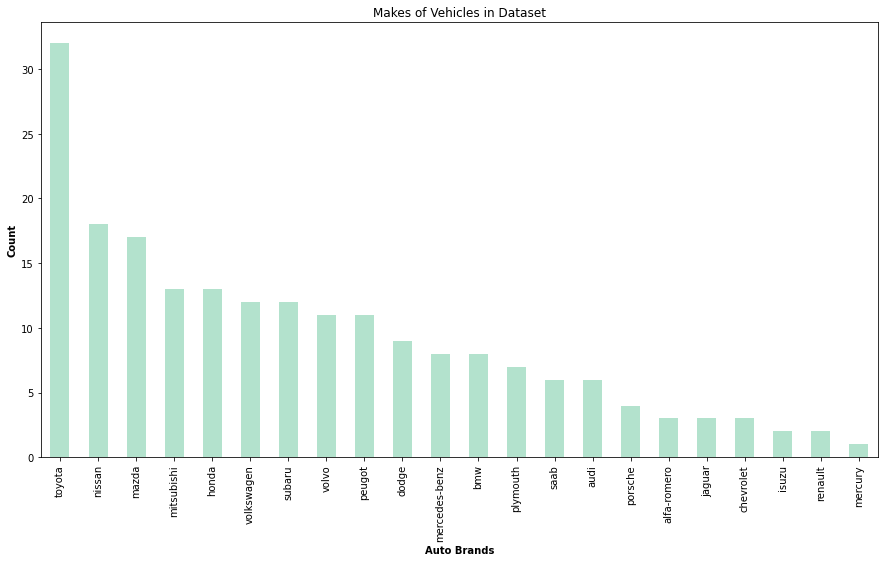

In [379]:
# Graph count of vehicle makes in dataset
plt.rcParams['figure.figsize'] = [15,8]
ax=df['make'].value_counts().plot(kind='bar',stacked=True, colormap = 'Pastel2')
ax.title.set_text('Makes of Vehicles in Dataset')
plt.xlabel("Auto Brands",fontweight = 'bold')
plt.ylabel("Count",fontweight = 'bold')

We see that Toyota is the most common make in our dataset by far. Mercury is the least common.

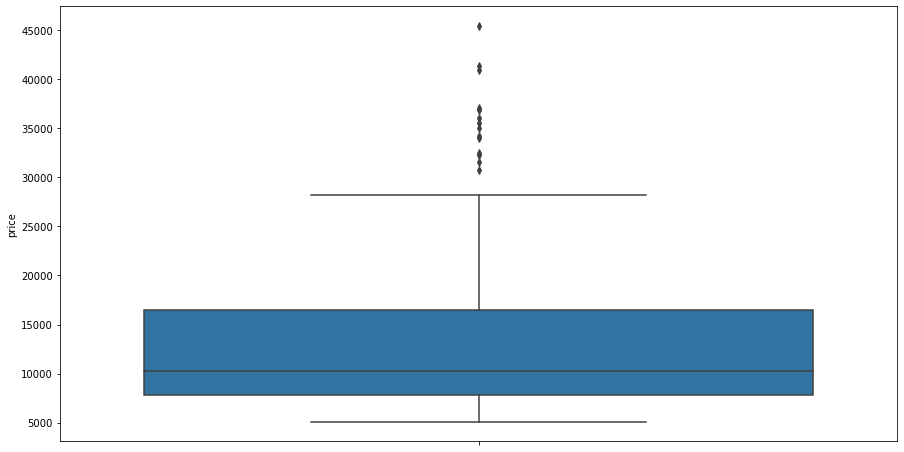

In [378]:
sns.boxplot(y = df['price'])

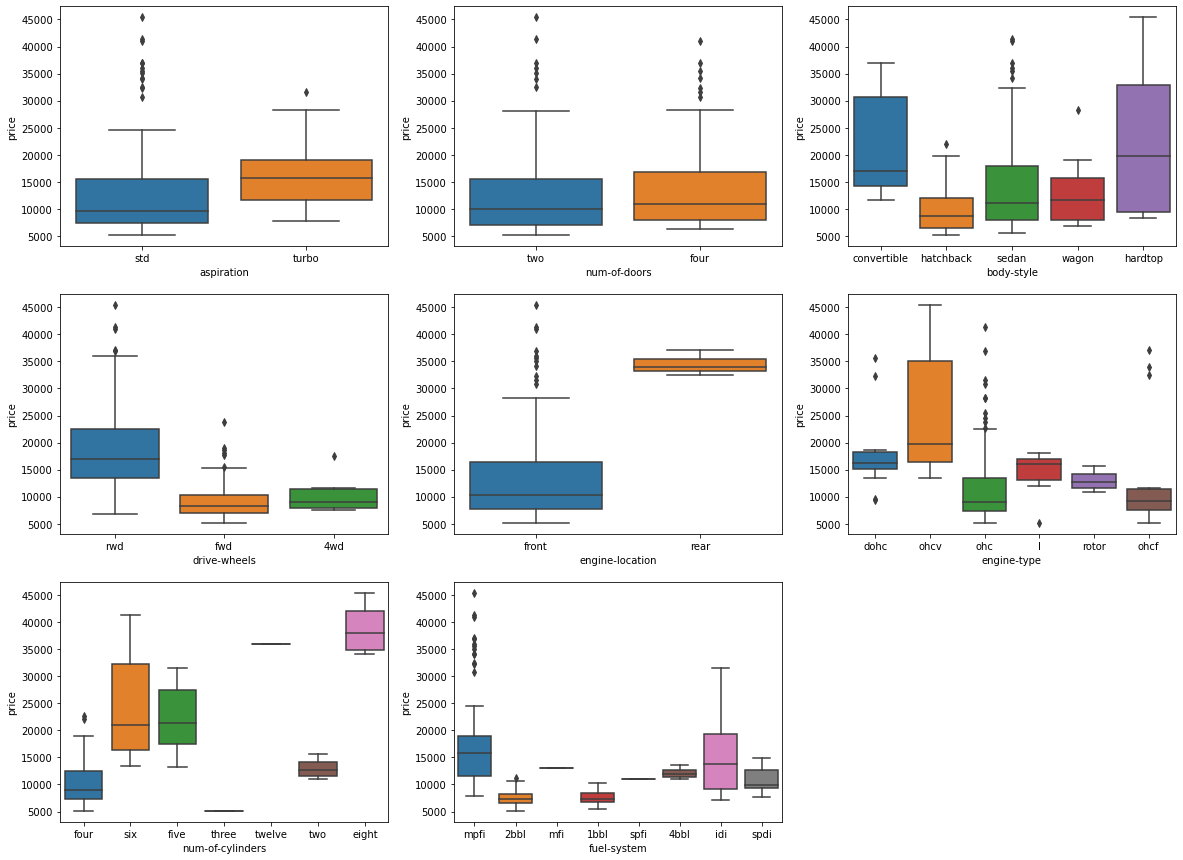

In [381]:
# Graph for each categorical feature
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'num-of-doors', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'body-style', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'engine-location', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'engine-type', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'num-of-cylinders', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'fuel-system', y = 'price', data = df)
plt.show()

From the box plots above, there are some interesting trends:
* There are more than a few outliers in price.
* Automobiles with engines in the rear are more expensive than ones with engines in the front.
* Convertibles and hardtops are generally more expensive than vehicles with other body styles.
* We see a general trend that as the number of cylinders increases, the price does too.
* Automobiles with rear wheel drive (rwd) are generally more expensive than those with other drivetrains (fwd, 4wd).
* Automobiles with the ohcv engine type are more expensive than automobiles with other engine types.
* The number of doors on a vehicle does not seem to impact the price.
    
Let's view correlations with price. We will do this through box plots with categorical values and a correlation heatmap with numerical values.

Text(0.5, 1.0, 'Correlation Heatmap')

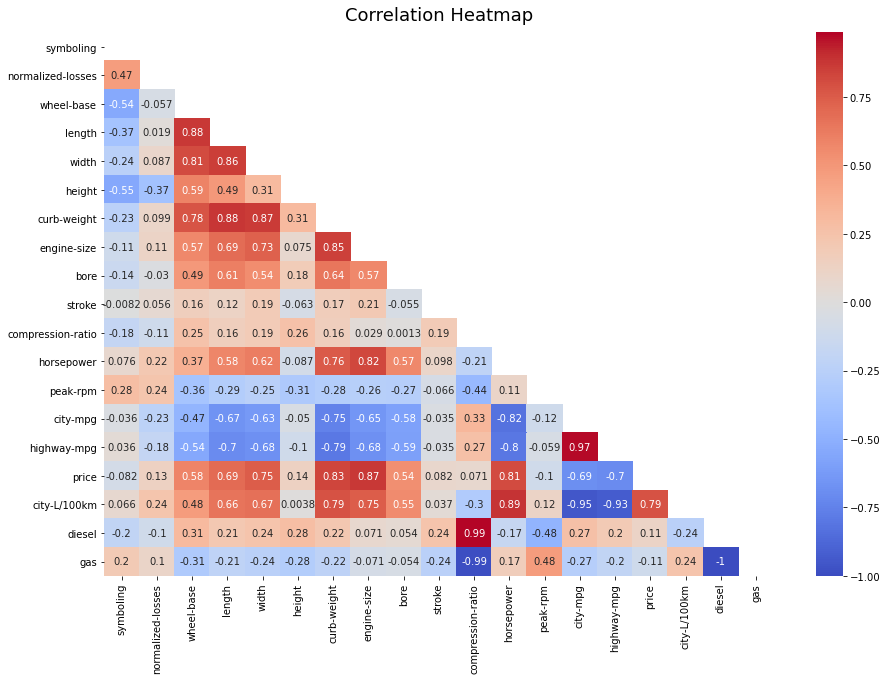

In [382]:
# Create object for graph
price_cor = df.corr()

# Remove half of heatmap
mask = np.zeros(price_cor.shape, dtype = bool)
mask[np.triu_indices(len(mask))] = True

# Graph correlation heatmap
plt.subplots(figsize = (15,10))
cor_heatmap = sns.heatmap(price_cor, xticklabels = price_cor.columns, yticklabels = price_cor.columns, annot = True, annot_kws={'size': 10}, cmap = 'coolwarm', mask = mask)
cor_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)


We see a strong positive correlation ( > 0.7) between the following features and price:
* engine-size (0.87)
* curb-weight (0.83)
* horsepower (0.81)
* width (0.75)
    
We see a strong negative correlation ( < -0.7) between the following features and price:
* highway-mpg (-0.7)
    
However, we can incorporate our categorical data into this numerical data throught the use of pd.getdummies. By doing this, we can also check the correlations of these categorical features with price.

## Data Cleaning

Now that we've reviewed our data, let's take a look at places where it could use some cleaning. To begin, let's look for null values.

In [383]:
# Check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

Based on this information and the data exploration above, we see that there are a number of changes we need to make to clean this data. Some changes we need to make include:

* Removing columns that are not helpful in determining price 
    * These include the columns 'symboling' and 'normalized-losses', which deal with automobile insurance policies 
* Removing superfluous columns 
    * We do not need 'horsepower-binned' when we have the 'horsepower' column that we can bin as needed 
    * We also have two different measurements of fuel economy, so we will remove 'city-L/100km', which is uncommon in the US
* Remove price outliers which can distort our data
* Address null values in our dataset

Let's start by removing the unnecessary columns and the price outliers

In [384]:
# Remove unnecessary columns
df.drop(['symboling', 'normalized-losses', 'horsepower-binned', 'city-L/100km'], axis = 1, inplace = True)

# Remove price outliers through IQR
# Find IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Find outlier values
top_price = Q3 + 1.5*IQR
low_price = Q1 - 1.5*IQR

# Remove price outliers from the dataframe
df = df[df['price'] >= low_price]
df = df[df['price'] <= top_price]

# Check numerical data
df.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,183.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,98.310160,0.831156,0.911735,53.783422,2483.262032,118.652406,3.307428,3.251913,10.207059,97.339638,5119.790048,25.871658,31.449198,11503.176471,0.101604,0.898396
std,5.308094,0.054418,0.025559,2.434782,443.307984,26.892299,0.261905,0.309285,4.040858,29.985725,473.692595,6.092883,6.380526,4979.406542,0.302938,0.302938
min,86.600000,0.678039,0.837500,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,20.000000,5118.000000,0.000000,0.000000
25%,94.500000,0.799135,0.888889,52.000000,2134.000000,97.000000,3.150000,3.135000,8.700000,70.000000,4800.000000,21.000000,26.000000,7649.000000,0.000000,1.000000
50%,96.500000,0.829409,0.908333,54.100000,2395.000000,110.000000,3.310000,3.290000,9.000000,94.000000,5200.000000,25.000000,31.000000,9960.000000,0.000000,1.000000
75%,100.800000,0.857520,0.923611,55.500000,2823.500000,136.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,30.500000,36.500000,15145.000000,0.000000,1.000000
max,114.200000,0.955790,0.991667,59.800000,3750.000000,183.000000,3.940000,3.900000,23.000000,200.000000,6600.000000,49.000000,54.000000,28248.000000,1.000000,1.000000


We've removed unnecessary columns and price outliers. Let's look at our null values and decide what to do with them.

In [385]:
# Find nulls
def nans(df): 
    return df[df.isnull().any(axis=1)]
nans(df)

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas
52,mazda,std,two,hatchback,rwd,front,95.3,0.81211,0.9125,49.6,...,3.329751,NaN,9.4,101.0,6000.0,17,23,10945.0,0,1
53,mazda,std,two,hatchback,rwd,front,95.3,0.81211,0.9125,49.6,...,3.329751,NaN,9.4,101.0,6000.0,17,23,11845.0,0,1
54,mazda,std,two,hatchback,rwd,front,95.3,0.81211,0.9125,49.6,...,3.329751,NaN,9.4,101.0,6000.0,17,23,13645.0,0,1
55,mazda,std,two,hatchback,rwd,front,95.3,0.81211,0.9125,49.6,...,3.329751,NaN,9.4,135.0,6000.0,16,23,15645.0,0,1


We see that all the null values exist in the column 'stroke'. A decision needs to be made regarding what to do with these null values. Although dropping them is easiest, we can check the distribution of the column stroke with a histogram.

C:\Users\saulc\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\saulc\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


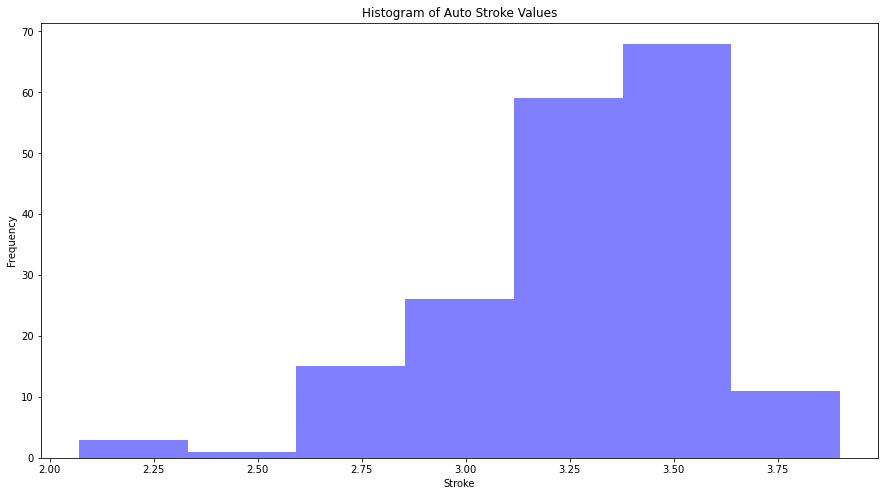

In [386]:
# Histogram of stroke
x = df['stroke']
num_bins = 7
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)

# Histogram settings
plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.title('Histogram of Auto Stroke Values')
plt.show()


The data is a bit skewed, so we have a few options: we can drop the rows with null values or impute with median values. Although dropping those rows is simpler, we can preserve data size by using the median. As such, the author has chosen to maintain data size and impute with the median.

In [387]:
# Fill missing values with the median value of the column
df = df.fillna(df.median())

# Check new values
df[52:56]

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas
58,mazda,std,two,hatchback,fwd,front,98.8,0.854397,0.923611,53.7,...,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0,0,1
59,mazda,std,four,sedan,fwd,front,98.8,0.854397,0.923611,55.5,...,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0,0,1
60,mazda,std,four,sedan,fwd,front,98.8,0.854397,0.923611,55.5,...,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0,1,0
61,mazda,std,four,hatchback,fwd,front,98.8,0.854397,0.923611,55.5,...,3.39,3.39,8.6,84.0,4800.0,26,32,11245.0,0,1


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 200
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               187 non-null    object 
 1   aspiration         187 non-null    object 
 2   num-of-doors       187 non-null    object 
 3   body-style         187 non-null    object 
 4   drive-wheels       187 non-null    object 
 5   engine-location    187 non-null    object 
 6   wheel-base         187 non-null    float64
 7   length             187 non-null    float64
 8   width              187 non-null    float64
 9   height             187 non-null    float64
 10  curb-weight        187 non-null    int64  
 11  engine-type        187 non-null    object 
 12  num-of-cylinders   187 non-null    object 
 13  engine-size        187 non-null    int64  
 14  fuel-system        187 non-null    object 
 15  bore               187 non-null    float64
 16  stroke             187 non

We've taken care of the null values, so there are no longer any null values in our dataset. We can now move on to addressing our features.

## Feature Engineering

With a cleaned dataset, we can start modifying features in a way that makes our dataset more useful. To do that, we should add helpful features, remove  
* Add new features that might be useful
    * Create a binned categorical feature for the average price of each car make
* Convert categorical data to numerical data using Pandas' getdummies

We will want to use Pandas' getdummies to convert our categorical data to numerical values. However, given that there are so many vehicle makes, we can bin them into categories based on the mean price of each make. That way, we don't let a given make impact our model too much, especially when there are few samples of some models.

In [389]:
# Determine mean price of each make
df.groupby(['make'])['price'].mean()

make
alfa-romero      15498.333333
audi             17859.166667
bmw              19999.000000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
mazda            10652.882353
mercedes-benz    27325.333333
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          22018.000000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64

In [390]:
# Create a function that defines quality of the make based on their mean value above
    # Budget = $0 to $9999, Midrange = $10000 to $19999, Premium = $20000+
def BrandQuality(row):
    if row['make'] == 'alfa-romero':
        return 'Midrange'
    elif row['make'] == 'audi':
        return 'Midrange'
    elif row['make'] == 'bmw':
        return 'Midrange'
    elif row['make'] == 'chevrolet':
        return 'Budget'
    elif row['make'] == 'dodge':
        return 'Budget'
    elif row['make'] == 'honda':
        return 'Budget'
    elif row['make'] == 'isuzu':
        return 'Budget'
    elif row['make'] == 'mazda':
        return 'Midrange'
    elif row['make'] == 'mercedes-benz':
        return 'Premium'
    elif row['make'] == 'mercury':
        return 'Midrange'
    elif row['make'] == 'mitsubishi':
        return 'Budget'
    elif row['make'] == 'nissan':
        return 'Midrange'
    elif row['make'] == 'peugot':
        return 'Midrange'
    elif row['make'] == 'plymouth':
        return 'Budget'
    elif row['make'] == 'porsche':
        return 'Premium'
    elif row['make'] == 'renault':
        return 'Budget'
    elif row['make'] == 'saab':
        return 'Midrange'
    elif row['make'] == 'subaru':
        return 'Budget'
    elif row['make'] == 'toyota':
        return 'Budget'
    elif row['make'] == 'volkswagen':
        return 'Midrange'
    elif row['make'] == 'volvo':
        return 'Midrange'
    else:
        return 'ErrorAlert'
    
# Incorporate into a new column
df['make-quality'] = df.apply(lambda row: BrandQuality(row), axis = 1)    

# Check results
df.head(10)

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,make-quality
0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,...,2.68,9.0,111.0,5000.0,21,27,13495.0,0,1,Midrange
1,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,...,2.68,9.0,111.0,5000.0,21,27,16500.0,0,1,Midrange
2,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,...,3.47,9.0,154.0,5000.0,19,26,16500.0,0,1,Midrange
3,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,...,3.40,10.0,102.0,5500.0,24,30,13950.0,0,1,Midrange
4,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,...,3.40,8.0,115.0,5500.0,18,22,17450.0,0,1,Midrange
5,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,53.1,...,3.40,8.5,110.0,5500.0,19,25,15250.0,0,1,Midrange
6,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,55.7,...,3.40,8.5,110.0,5500.0,19,25,17710.0,0,1,Midrange
7,audi,std,four,wagon,fwd,front,105.8,0.925997,0.991667,55.7,...,3.40,8.5,110.0,5500.0,19,25,18920.0,0,1,Midrange
8,audi,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,55.9,...,3.40,8.3,140.0,5500.0,17,20,23875.0,0,1,Midrange
9,bmw,std,two,sedan,rwd,front,101.2,0.849592,0.900000,54.3,...,2.80,8.8,101.0,5800.0,23,29,16430.0,0,1,Midrange


Now that we have created a new column to bin the makes, we can create dummy variables for the categorical features, update the dataframe, and remove the 'make' column.

In [391]:
# Create list of columns of categorical data
cat_columns = ['aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system', 'make-quality', 'num-of-cylinders', 'num-of-doors']

# Get dummy variables for these categorical columns and assign them to an object
dummy_vars = pd.get_dummies(df[cat_columns])

# Add to the dataframe
df = pd.concat([df, dummy_vars], axis = 1)

# Remove original categorical columns being replaced by dummy variables
df.drop(cat_columns, axis = 1, inplace = True)

In [392]:
# Drop 'make'
df.drop(['make'], axis = 1, inplace = True)

Since we have all these new variables, we need to put them on a similar scale. Otherwise, the coefficients can become very distorted. Since the dummy variables are on a particular scale that differs from the original numerical variables, we should convert the numerical variables to a similar scale by using standardization scaling.

In [393]:
# Create object for standardization scaler
scaler = StandardScaler()

# Isolate numerical columns
num_columns = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'diesel', 'gas']

# Apply scaler to columns
df[num_columns] = scaler.fit_transform(df[num_columns])

# Check correlations with price
cor_matrix = df.corr()
print(cor_matrix['price'].sort_values(ascending = False))

price                     1.000000
curb-weight               0.854573
width                     0.790317
engine-size               0.750113
length                    0.731624
horsepower                0.722010
wheel-base                0.667972
drive-wheels_rwd          0.635287
fuel-system_mpfi          0.520989
bore                      0.504435
make-quality_Premium      0.431538
num-of-cylinders_five     0.427372
aspiration_turbo          0.416772
num-of-cylinders_six      0.399347
make-quality_Midrange     0.398248
height                    0.258053
diesel                    0.237381
fuel-system_idi           0.237381
engine-type_ohcv          0.226971
compression-ratio         0.191017
engine-type_dohc          0.165440
engine-type_l             0.164750
num-of-doors_four         0.147690
body-style_sedan          0.133969
body-style_convertible    0.098588
stroke                    0.074804
body-style_wagon          0.068724
body-style_hardtop        0.054711
num-of-cylinders_two

We see from above how each feature correlates to price. However, correlation does not always mean significance. To narrow down our dataset, let's use recursive feature elimination (RFE). RFE essentially builds a model with every feature, then weighs each feature's importance. This allows us, through a process of elimination, to more easily narrow down the features that maximize the strength of the model while minimizing its cost. 

In [394]:
# Create dataset for Y
y_data = df['price']

# Create dataset for X
x_data = df.drop(['price'], axis = 1)

# Separate data into train and test groups using 25% of samples in test group
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 100)

# Report number of samples in each group
print('The number of training samples is:', x_train.shape[0])
print('The number of test samples is:', x_test.shape[0])

# Create model for RFE
lr = LinearRegression()

# Fit the model for RFE
lr.fit(x_train, y_train)

# Use Recursive Feature Elimination
rfe = RFE(lr, 15)
rfe = rfe.fit(x_train, y_train)

# Print list of features that show if they are in the top 15 features with boolean test
print('Is a given feature in the best 15 as determined by RFE?:')
print(list(zip(x_train.columns, rfe.support_, rfe.ranking_)))

The number of training samples is: 140
The number of test samples is: 47
Is a given feature in the best 15 as determined by RFE?:
[('wheel-base', False, 10), ('length', False, 30), ('width', False, 26), ('height', False, 14), ('curb-weight', True, 1), ('engine-size', False, 29), ('bore', False, 31), ('stroke', False, 18), ('compression-ratio', True, 1), ('horsepower', False, 17), ('peak-rpm', False, 32), ('city-mpg', False, 4), ('highway-mpg', False, 8), ('diesel', True, 1), ('gas', False, 19), ('aspiration_std', True, 1), ('aspiration_turbo', False, 5), ('body-style_convertible', True, 1), ('body-style_hardtop', False, 25), ('body-style_hatchback', False, 16), ('body-style_sedan', False, 15), ('body-style_wagon', True, 1), ('drive-wheels_4wd', False, 24), ('drive-wheels_fwd', True, 1), ('drive-wheels_rwd', False, 22), ('engine-location_front', False, 35), ('engine-type_dohc', False, 21), ('engine-type_l', False, 9), ('engine-type_ohc', True, 1), ('engine-type_ohcf', True, 1), ('engine

C:\Users\saulc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [395]:
# Best 15 features as determined by RFE
sig_cols = x_train.columns[rfe.support_]
sig_cols

Index(['curb-weight', 'compression-ratio', 'diesel', 'aspiration_std',
       'body-style_convertible', 'body-style_wagon', 'drive-wheels_fwd',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'fuel-system_mpfi', 'make-quality_Budget', 'make-quality_Premium',
       'num-of-cylinders_five', 'num-of-cylinders_four'],
      dtype='object')

Now we have our 15 most significant columns to determine price according to RFE. Let's add price to the mix and check the correlations again and then try out some models.

Text(0.5, 1.0, 'Correlation Heatmap')

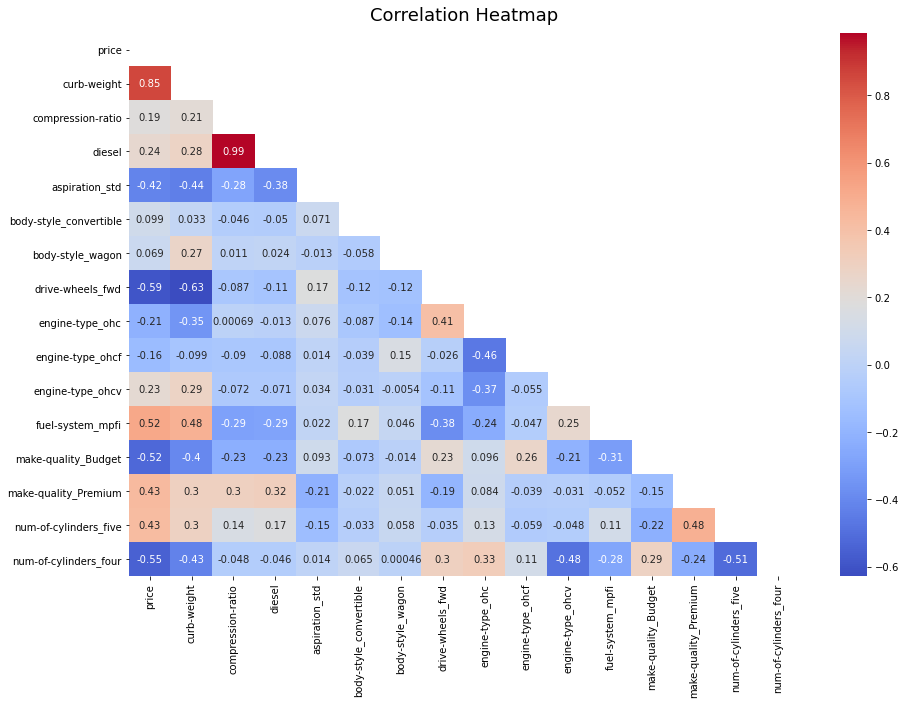

In [396]:
# Rename Object
sig_cols = ['price', 'curb-weight', 'compression-ratio', 'diesel', 'aspiration_std',
       'body-style_convertible', 'body-style_wagon', 'drive-wheels_fwd',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'fuel-system_mpfi', 'make-quality_Budget', 'make-quality_Premium',
       'num-of-cylinders_five', 'num-of-cylinders_four']

# Create object for graph
price_cor = df[sig_cols].corr()

# Remove half of heatmap
mask = np.zeros(price_cor.shape, dtype = bool)
mask[np.triu_indices(len(mask))] = True

# Graph correlation heatmap
plt.subplots(figsize = (15,10))
cor_heatmap = sns.heatmap(price_cor, xticklabels = price_cor.columns, yticklabels = price_cor.columns, annot = True, annot_kws={'size': 10}, cmap = 'coolwarm', mask = mask)
cor_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

## Data Modeling

Now that we have determined which features are best suited to building an effective linear regression model, we need to determine which type of model works best. To determine a which type of data model would best fit our data, we should explore both linear and multiple linear regression models.

#### Linear Regression
To begin, we will explore a simple linear regression model. Put simply, this model is summed up in the following equation, where X is our predictor variable and Y is the response or dependent variable:
$$
Y = \beta_{0} + \beta_{1}X + \epsilon
$$

We see that one feature that is strongly correlated to price is curb weight. Our RFE process also includes it as a significant feature. As such, we will focus our linear regression model on that. Essentially, we want to view how curb weight can help us predict a car's price. This model will use "curb-weight" as the predictor/independent variable and "price" as the response/dependent variable.

In [397]:
# Let's create a linear regression object
lr = LinearRegression()

# Set variables
X = df[['curb-weight']]
Y = df['price']

# Fit the model
lr.fit(X,Y)

# Check intercept and slope
lr.intercept_, lr.coef_

(2.5113887344675366e-16, array([0.8545731]))

We've been given our values of the intercept (beta 0) and slope (beta 1). 
$$
Y = \beta_{0} + \beta_{1}X + \epsilon
$$

So the final estimated linear regression model is:

<div align="center"><i><b>price</b> = 0 + 0.855(curb-weight)</i>

Let's look at this visually through a regression plot, and then view the variance through a residual plot.

Text(0.5, 1.0, 'Regression Plot of Curb Weight and Price')

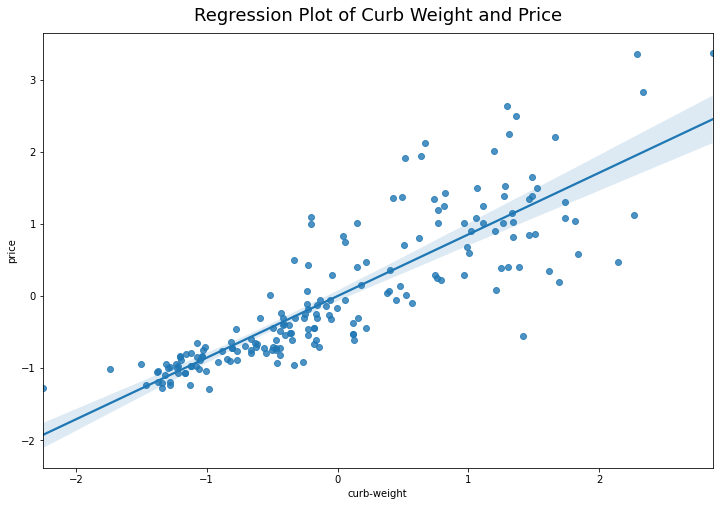

In [398]:
# Regression plot
plt.figure(figsize=(12,8))
regplot1 = sns.regplot(x = df['curb-weight'], y = df['price'], data = df)
regplot1.set_title('Regression Plot of Curb Weight and Price', fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'Residual Plot of Curb Weight and Price')

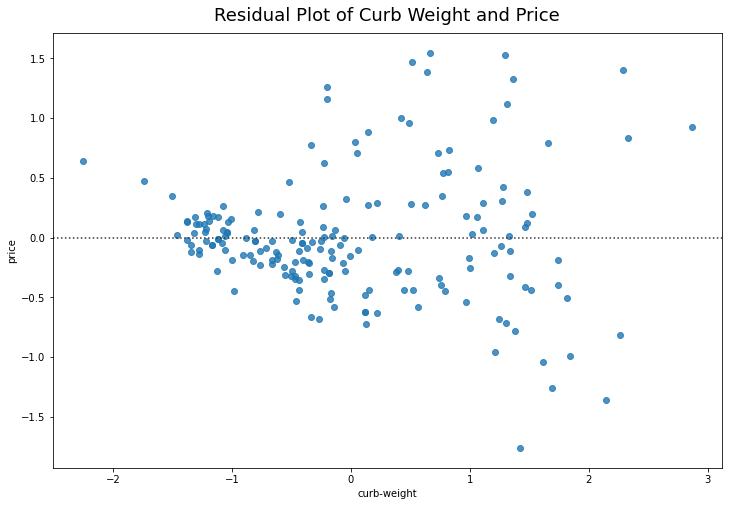

In [399]:
# Residual Plot
plt.figure(figsize=(12, 8))
resplot1 = sns.residplot(df['curb-weight'], df['price'], data = df)
resplot1.set_title('Residual Plot of Curb Weight and Price', fontdict={'fontsize':18}, pad=12)

What we see from above is that price is positively correlated to curb-weight, which we knew from the correlation heatmap. But we also see some variance, as not all the dots are close to the line. When we view this through the residual plot, we see that there is some randomness in the spread of residuals, which is good. However, the residuals do seem more tightly bound on the left than on the right, so there may be further room for improvement. As such, we should evaluate the accuracy of this model by calculating the R-Squared and Mean Squared Error values.

In [400]:
# Fit the model
lr.fit(X, Y)

# Print R-squared
print('The R-squared is:', lr.score(X, Y))

# Calculate and print MSE
Yhat = lr.predict(X)
MSE = mean_squared_error(Y, Yhat)
print('The mean squared error of actual price and predicted price is:', MSE)

The R-squared is: 0.7302951897977729
The mean squared error of actual price and predicted price is: 0.26970481020222725


In [401]:
# Let's check this model with statsmodel
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     500.9
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.56e-54
Time:                        01:39:01   Log-Likelihood:                -142.82
No. Observations:                 187   AIC:                             289.6
Df Residuals:                     185   BIC:                             296.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.631e-16      0.038  -4.27e-15      

We can say that approximately 73% of the variation of price is explained by this linear model with 'curb-weight'.

Now we will try a Multiple Linear Regression model, and evaluate it to compare which model will better meet our goals.

#### Multiple Linear Regression

We can try to predict car price by using more than one variable. We will take five features from our RFE list: 'curb-weight', 'compression-ratio', 'diesel', 'aspiration_std', and 'body-style_convertible'. The equation for this multiple linear regression is:

$$
Y = \beta_{0} + \beta_{1} X_{1} + \beta_{2}X_{2} + \cdots \beta_{p}X_{p} + \epsilon
$$

We will develop a model based on those five predictor variables.

In [402]:
# Create object for predictor variables
Z = df[['curb-weight', 'compression-ratio', 'diesel', 'aspiration_std', 'body-style_convertible']]

# Restating response variable
Y = df['price']

# Fit the model
lr.fit(Z, Y)

# Check intercept and slopes
lr.intercept_, lr.coef_

(0.3652278869609626,
 array([ 0.86154196,  1.09295176, -1.14875727, -0.46323414,  0.52849374]))

Now let's return to the equation and determine our values of the intercept (a) and the slopes (b).

Our estimated multiple linear regression model is:

<div align="center"><i><b>price</b> = 0.365 + 0.861(curb-weight) + 1.093(compression-ratio) - 1.149(diesel) - 0.463(aspiration_std) + 0.528(body-style_convertible)</i>

Let's look at this visually, by comparing modeled values to actual values.

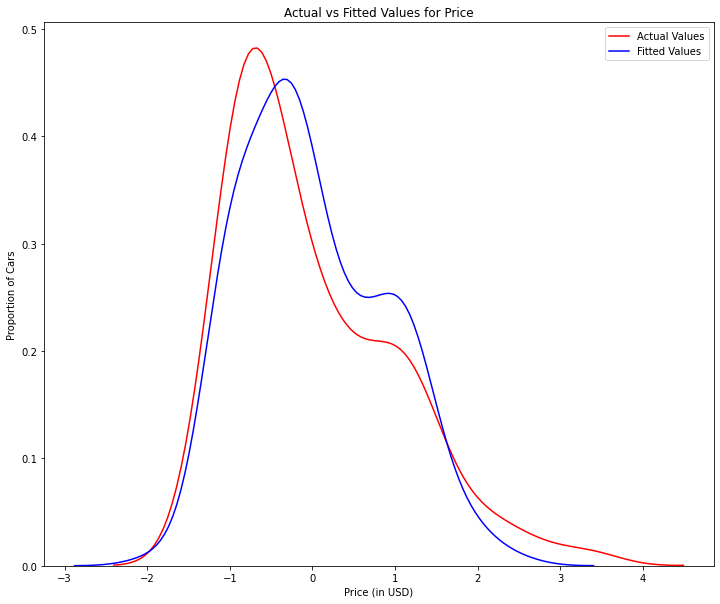

In [403]:
# Create a function for graphing distribution plots
def DistributionPlot(RedPlot, BluePlot, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))
    ax1 = sns.distplot(RedPlot, hist = False, color = 'r', label = RedName)
    ax2 = sns.distplot(BluePlot, hist = False, color = 'b', label = BlueName, ax = ax1)
    plt.title(Title)
    plt.xlabel('Price (in USD)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

# Graph distribution plot for this multiple linear regression
Title = 'Actual vs Fitted Values for Price'
DistributionPlot(Y, Yhat, 'Actual Values', 'Fitted Values', Title)


Overall, the fitted values are relatively close to the actual values, but there is room to improve this model, as we do see some differences in the peaks of each line. We should now find this model's R-squared and Mean Squared Error values.

In [404]:
# Fit the model
lr.fit(Z, Y)

# Print R-squared
print('The R-squared is:', lr.score(Z, Y))

# Calculate and print MSE
Yhat = lr.predict(Z)
MSE = mean_squared_error(Y, Yhat)
print('The mean squared error of actual price and predicted price is:', MSE)

The R-squared is: 0.7551703176483828
The mean squared error of actual price and predicted price is: 0.24482968235161728


In [405]:
# Let's check this model with statsmodel
Z = sm.add_constant(Z)
model = sm.OLS(Y, Z).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     111.7
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           2.15e-53
Time:                        01:39:12   Log-Likelihood:                -133.77
No. Observations:                 187   AIC:                             279.5
Df Residuals:                     181   BIC:                             298.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### We can now compare the simple linear regression and multiple linear regression models.

Simple Linear Regression: using 'curb-weight' as a predictor of 'price'.
* R-squared: 0.7302951897977729
* MSE: 0.26970481020222725
    
Multiple Linear Regression: using 'curb-weight', 'compression-ratio', 'diesel', 'aspiration_std', and 'body-style_convertible' as predictors of 'price'.
* R-squared: 0.7551703176483828
* MSE: 0.24482968235161728
    
We see that the R-squared value for the Multiple Linear Regression model is larger than that of the Simple Linear Regression model. Moreover, we also see that the MSE for the Multiple Linear Regression model is smaller than that of the Simple Linear Regression Model. Both of these metrics indicate that the Multiple Linear Regression model is a better model for us to use. Now we should further train, test, and refine the model.

## Model Refinement

It's clear that a multiple linear regression model is more effective, but we still only reached an R-Square value of 0.755, meaning that approximately 75.5% of the variation of price is explained by this our model. We will need to improve this model if it is to be relied on to meet the business' goals.

To begin, we will need to separate our data into training and test sets. To ensure we have at least 50 samples in our test set, we will split the data with 73% in the training set and 27% in the test set. 

#### Model Attempt 1

In [406]:
# Create dataset for Y
y_data = df['price']

# Create dataset for X by removing price
x_data = df.drop(['price'], axis = 1)

In [407]:
# Separate data into train and test groups using 27% of samples in test group
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.27, random_state = 100)

# Report number of samples in each group
print('The number of training samples is:', x_train.shape[0])
print('The number of test samples is:', x_test.shape[0])

The number of training samples is: 136
The number of test samples is: 51


Now that we have set our training and test groups, we can apply them to our Multiple Linear Regression model.

In [408]:
# Create object for list of features
MLR1 = ['curb-weight', 'compression-ratio', 'diesel', 'aspiration_std',
       'body-style_convertible', 'body-style_wagon', 'drive-wheels_fwd',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'fuel-system_mpfi', 'make-quality_Budget', 'make-quality_Premium',
       'num-of-cylinders_five', 'num-of-cylinders_four']

# Fit the model to our training group
lr.fit(x_train[MLR1], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR1])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR1])

Now let's graph the distribution of the predicted values versus actual values in both the training and test groups.

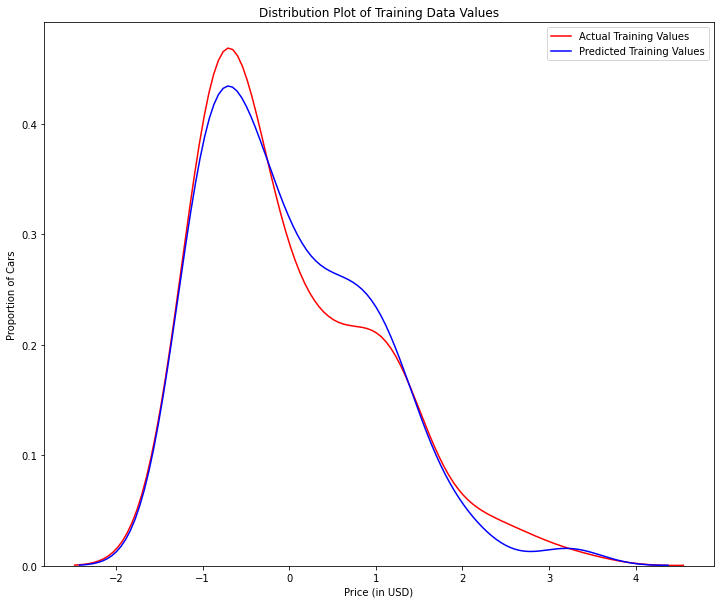

In [409]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

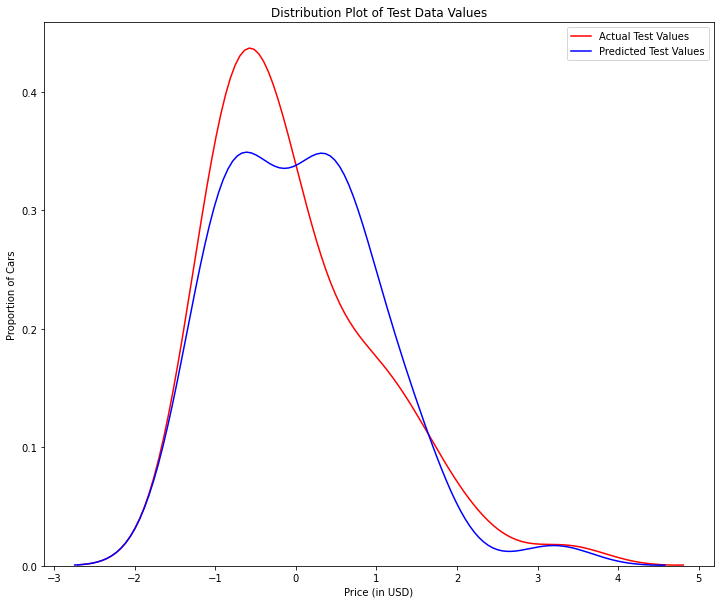

In [410]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [411]:
# Let's check the training model with statsmodel
X = x_train[MLR1]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     75.75
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           9.61e-54
Time:                        01:40:00   Log-Likelihood:                -33.349
No. Observations:                 136   AIC:                             98.70
Df Residuals:                     120   BIC:                             145.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [412]:
# Let's check the test group with statsmodel
X = x_test[MLR1]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     24.10
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           4.49e-14
Time:                        01:40:03   Log-Likelihood:                -10.397
No. Observations:                  51   AIC:                             52.79
Df Residuals:                      35   BIC:                             83.70
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [413]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.8481785499051899


From this model, we wind up with an R-squared value in the training group of 0.904, meaning 90.4% of the variance in the training data can be explained by the model. The test group's R-squared score was close at 0.912. Having the R-squared scores of these two sets so close to each other is indicative of success, but we can still refine this further. Our overall R-sqared score for this model is 0.848. Graphically, the distribution plot for the predicted test data values does not look all that similar to the actual test data values. 

We should see if we can lower the cost of this model by decreasing the features included while maintaining a high R-squared score.

From the training group data, we see that the P-value of 'compression-ratio' is highest at a level greater than 0.05, meaning it likely isn't significant. So in our model refinement, we should remove it.

#### Model Attempt 2

In [414]:
# Create object for list of features
MLR2 = ['curb-weight', 'diesel', 'aspiration_std',
       'body-style_convertible', 'body-style_wagon', 'drive-wheels_fwd',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'fuel-system_mpfi', 'make-quality_Budget', 'make-quality_Premium',
       'num-of-cylinders_five', 'num-of-cylinders_four']

# Fit the model to our training group
lr.fit(x_train[MLR2], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR2])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR2])

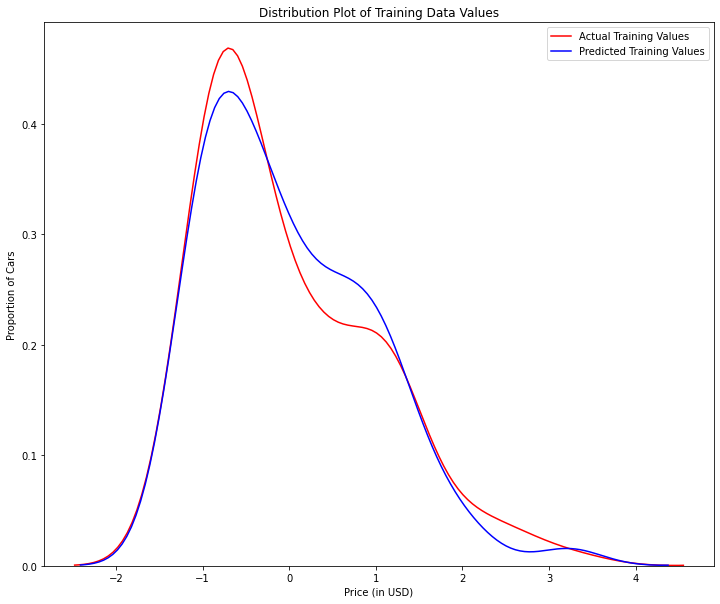

In [415]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

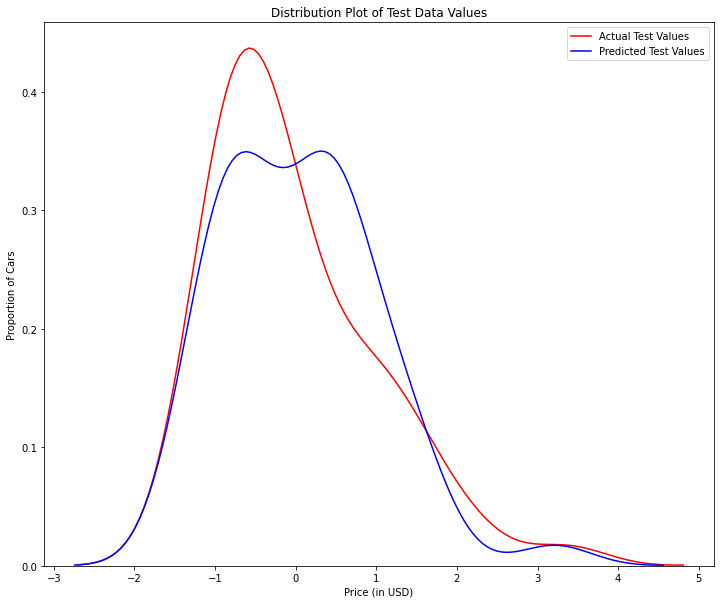

In [416]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [417]:
# Let's check the training group with statsmodel
X = x_train[MLR2]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     81.59
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.23e-54
Time:                        01:45:26   Log-Likelihood:                -33.539
No. Observations:                 136   AIC:                             97.08
Df Residuals:                     121   BIC:                             140.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [418]:
# Let's check the test group with statsmodel
X = x_test[MLR2]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     23.50
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           5.83e-14
Time:                        01:45:38   Log-Likelihood:                -13.222
No. Observations:                  51   AIC:                             56.44
Df Residuals:                      36   BIC:                             85.42
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [419]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.8462245774431527


From this model, we wind up with an R-squared value in the training group of 0.904, meaning 90.4% of the variance in the training data can be explained by the model. The test group's R-squared score was close at 0.901. Our overall R-sqared score for this model fell to 0.846.

This model also seems successful, but we can still refine this further. Again, we should look to lower the cost by reducing the features included.

From the training group data, we see that the P-value of 'diesel' is higher than 0.05, meaning it's not that significant. So in our model refinement, we should remove it.

#### Model Attempt 3

In [420]:
# Create object for list of features
MLR3 = ['curb-weight', 'aspiration_std', 'body-style_convertible',
       'body-style_wagon', 'drive-wheels_fwd',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'fuel-system_mpfi', 'make-quality_Budget', 'make-quality_Premium',
       'num-of-cylinders_five', 'num-of-cylinders_four']

# Fit the model to our training group
lr.fit(x_train[MLR3], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR3])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR3])

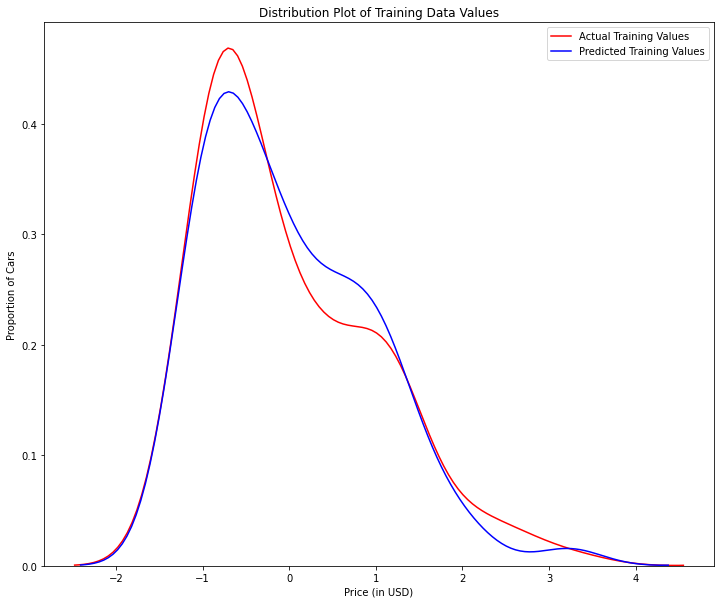

In [421]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

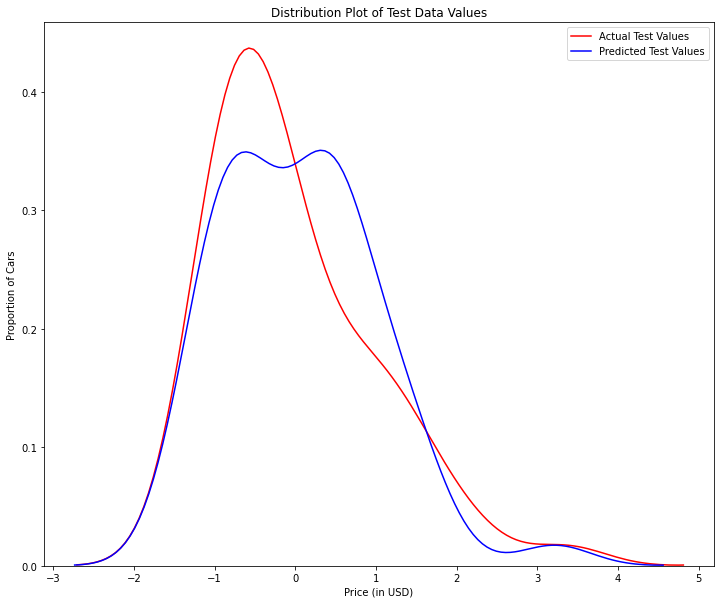

In [422]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [423]:
# Let's check the training group with statsmodel
X = x_train[MLR3]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     88.58
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.29e-55
Time:                        01:57:18   Log-Likelihood:                -33.548
No. Observations:                 136   AIC:                             95.10
Df Residuals:                     122   BIC:                             135.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [424]:
# Let's check the test group with statsmodel
X = x_test[MLR3]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     24.20
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           3.55e-14
Time:                        01:57:21   Log-Likelihood:                -14.877
No. Observations:                  51   AIC:                             57.75
Df Residuals:                      37   BIC:                             84.80
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [425]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.8457527870235269


From this model, we wind up with an R-squared value in the training group of 0.904, meaning 90.4% of the variance in the training data can be explained by the model. The test group's R-squared score was close at 0.895. The model's overall R-squared score is 0.846. 

Again, this seems to be a good model, but it is still open to further refinement. We can lower the cost of this model by decreasing the features included while hopefully maintaining a high R-squared score.

From the training group data, we see that the P-value of 'num-of-cylinders_five' is higher than 0.05, meaning it likely isn't that significant. So in our model refinement, we should remove it.

#### Model Attempt 4

In [426]:
# Create object for list of features
MLR4 = ['curb-weight', 'aspiration_std', 'body-style_convertible',
       'body-style_wagon', 'drive-wheels_fwd',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'fuel-system_mpfi', 'make-quality_Budget', 'make-quality_Premium',
       'num-of-cylinders_four']

# Fit the model to our training group
lr.fit(x_train[MLR4], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR4])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR4])

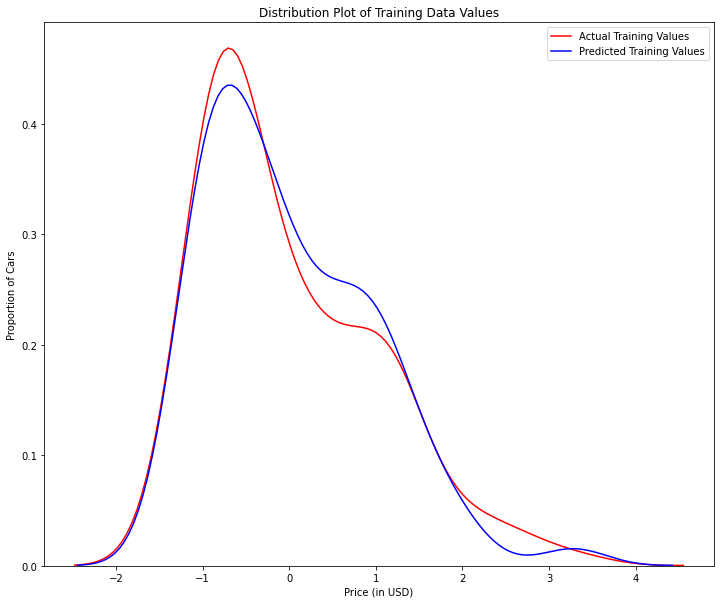

In [427]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

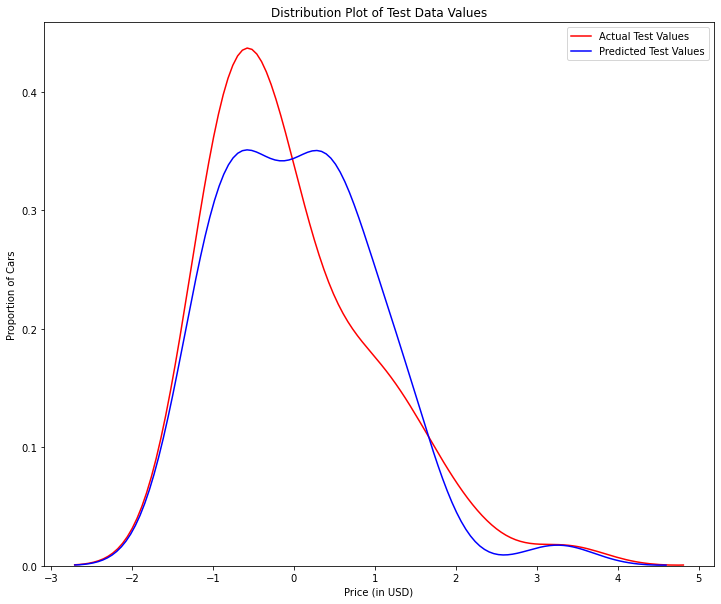

In [428]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [429]:
# Let's check the training group with statsmodel
X = x_train[MLR4]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     94.95
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           3.59e-56
Time:                        02:01:17   Log-Likelihood:                -34.698
No. Observations:                 136   AIC:                             95.40
Df Residuals:                     123   BIC:                             133.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [430]:
# Let's check the test group with statsmodel
X = x_test[MLR4]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     26.72
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           7.50e-15
Time:                        02:01:19   Log-Likelihood:                -15.048
No. Observations:                  51   AIC:                             56.10
Df Residuals:                      38   BIC:                             81.21
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [431]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.8448464480753897


From this model, we wind up with an R-squared value in the training group of 0.903, meaning 90.3% of the variance in the training data can be explained by the model. The test group's R-squared score was close at 0.894. The model's overall R-squared score is 0.845.

Again, this seems to be a good model, but it is still open to further refinement. We can lower the cost of this model by decreasing the features included while hopefully maintaining a high R-squared score.

From the training group data, we see that the P-value of 'body-style_convertible' is higher than 0.05, meaning it likely isn't that significant. So in our model refinement, we should remove it.

#### Model Attempt 5

In [432]:
# Create object for list of features
MLR5 = ['curb-weight', 'aspiration_std', 'body-style_wagon', 'drive-wheels_fwd',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'fuel-system_mpfi', 'make-quality_Budget', 'make-quality_Premium',
       'num-of-cylinders_four']

# Fit the model to our training group
lr.fit(x_train[MLR5], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR5])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR5])

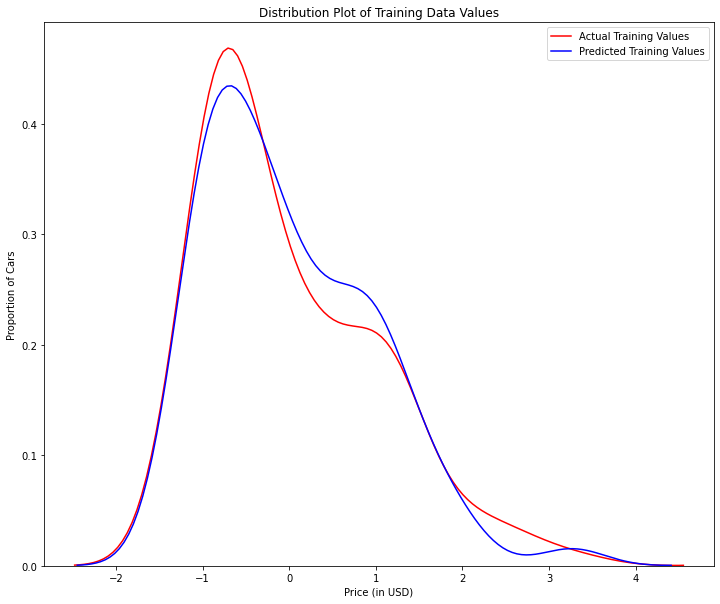

In [433]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

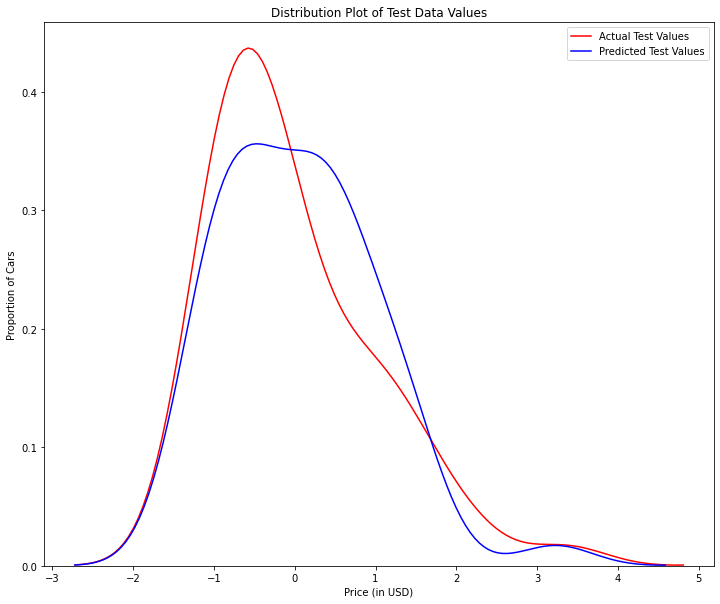

In [434]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [435]:
# Let's check the training group with statsmodel
X = x_train[MLR5]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     102.5
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           9.53e-57
Time:                        02:02:27   Log-Likelihood:                -35.830
No. Observations:                 136   AIC:                             95.66
Df Residuals:                     124   BIC:                             130.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.73

In [436]:
# Let's check the test group with statsmodel
X = x_test[MLR5]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     27.43
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           5.75e-15
Time:                        02:02:32   Log-Likelihood:                -17.018
No. Observations:                  51   AIC:                             58.04
Df Residuals:                      39   BIC:                             81.22
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.82

In [437]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.8330026733332854


From this model, we wind up with an R-squared value in the training group of 0.901, meaning 90.1% of the variance in the training data can be explained by the model. The test group's R-squared score was about the same at 0.886. The model's overall R-squared score is 0.833. Graphically, the distribution plot for the test set looks like it is improving.

Again, this seems to be a good model, but it is still open to further refinement. We can lower the cost of this model by decreasing the features included while hopefully maintaining a high R-squared score.

From the training group data, we see that the P-value of 'engine-type_ohcv' is higher than 0.05, meaning it likely isn't that significant. So in our model refinement, we should remove it.

#### Model Attempt 6

In [438]:
# Create object for list of features
MLR6 = ['curb-weight', 'aspiration_std', 'body-style_wagon', 'drive-wheels_fwd',
       'engine-type_ohc', 'engine-type_ohcf', 'fuel-system_mpfi', 
       'make-quality_Budget', 'make-quality_Premium', 'num-of-cylinders_four']

# Fit the model to our training group
lr.fit(x_train[MLR6], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR6])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR6])

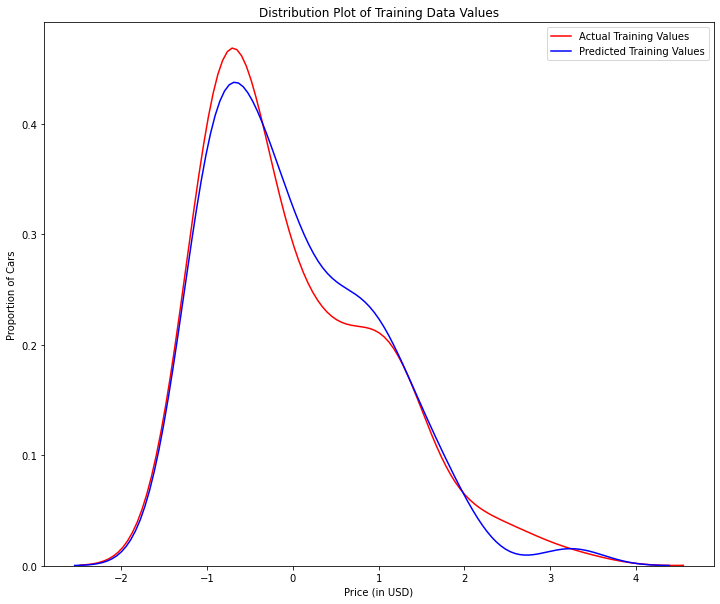

In [439]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

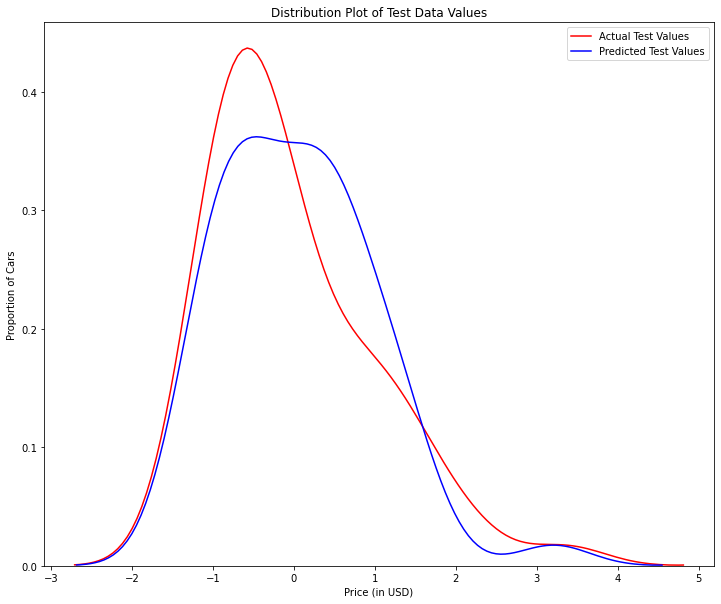

In [440]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [441]:
# Let's check the training group with statsmodel
X = x_train[MLR6]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     110.7
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           3.85e-57
Time:                        02:03:26   Log-Likelihood:                -37.461
No. Observations:                 136   AIC:                             96.92
Df Residuals:                     125   BIC:                             129.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.65

In [442]:
# Let's check the test group with statsmodel
X = x_test[MLR6]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     27.34
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           8.35e-15
Time:                        02:03:28   Log-Likelihood:                -19.799
No. Observations:                  51   AIC:                             61.60
Df Residuals:                      40   BIC:                             82.85
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.78

In [443]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.8277451947977724


From this model, we wind up with an R-squared value in the training group of 0.899, meaning 89.9% of the variance in the training data can be explained by the model. The test group's R-squared score was about the same at 0.872. The model's overall R-squared score fell to 0.828. 

Again, this seems to be a good model, but it is still open to further refinement. We can lower the cost of this model by decreasing the features included while hopefully maintaining a high R-squared score.

From the training group data, we see none of the P-values of our features are higher than 0.05, meaning they are all likely significant. However, in an effort to reduce the cost of the model, we will remove 'engine-type_ohcf', which has the highest P-value.

#### Model Attempt 7

In [467]:
# Create object for list of features
MLR7 = ['curb-weight', 'aspiration_std', 'body-style_wagon', 'drive-wheels_fwd','engine-type_ohc', 
       'fuel-system_mpfi', 'make-quality_Budget', 'make-quality_Premium', 'num-of-cylinders_four']

# Fit the model to our training group
lr.fit(x_train[MLR7], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR7])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR7])

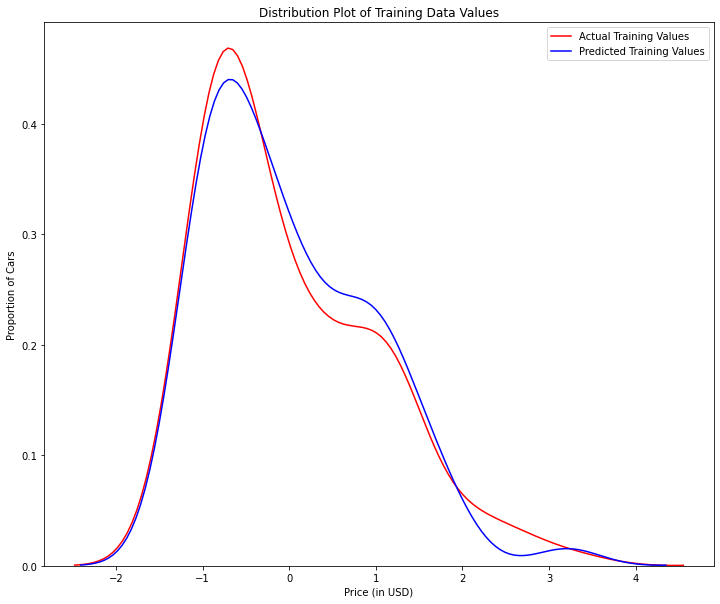

In [468]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

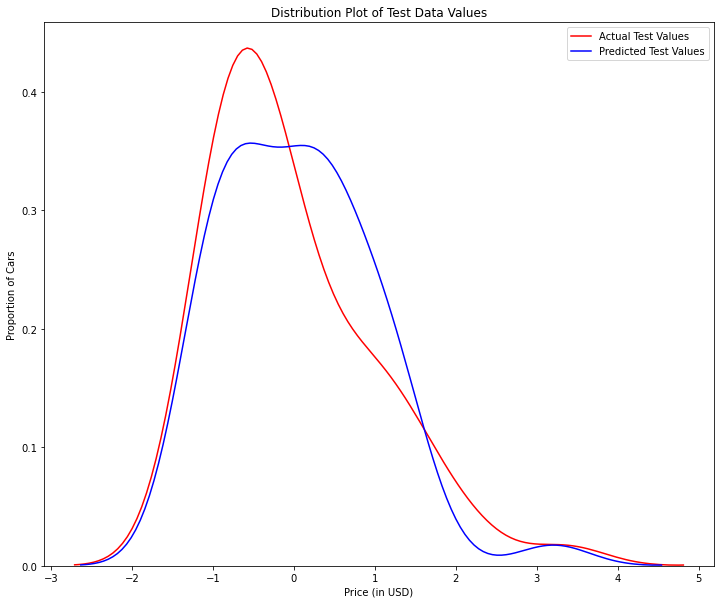

In [469]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [470]:
# Let's check the training group with statsmodel
X = x_train[MLR7]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           7.60e-57
Time:                        02:17:08   Log-Likelihood:                -40.850
No. Observations:                 136   AIC:                             101.7
Df Residuals:                     126   BIC:                             130.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.70

In [471]:
# Let's check the test group with statsmodel
X = x_test[MLR7]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     31.09
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.48e-15
Time:                        02:17:10   Log-Likelihood:                -19.830
No. Observations:                  51   AIC:                             59.66
Df Residuals:                      41   BIC:                             78.98
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.80

In [472]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.8351301173406971


From this model, we wind up with an R-squared value in the training group of 0.893, meaning 89.3% of the variance in the data can be explained by the model. The test group's R-squared score was close at 0.872. The model's overall R-squared score has increased to 0.835.

Again, we have a good model. Of note, all of the remaining features in this model have a very small P-value, meaning all of them are likely significant.

However, in an attempt to lower the cost of the model, we will remove 'body-style_wagon', as it is the feature with the highest p-value

#### Model Attempt 8

In [478]:
# Create object for list of features
MLR8 = ['curb-weight', 'aspiration_std', 'drive-wheels_fwd','engine-type_ohc', 
       'fuel-system_mpfi', 'make-quality_Budget', 'make-quality_Premium', 'num-of-cylinders_four']

# Fit the model to our training group
lr.fit(x_train[MLR8], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR8])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR8])

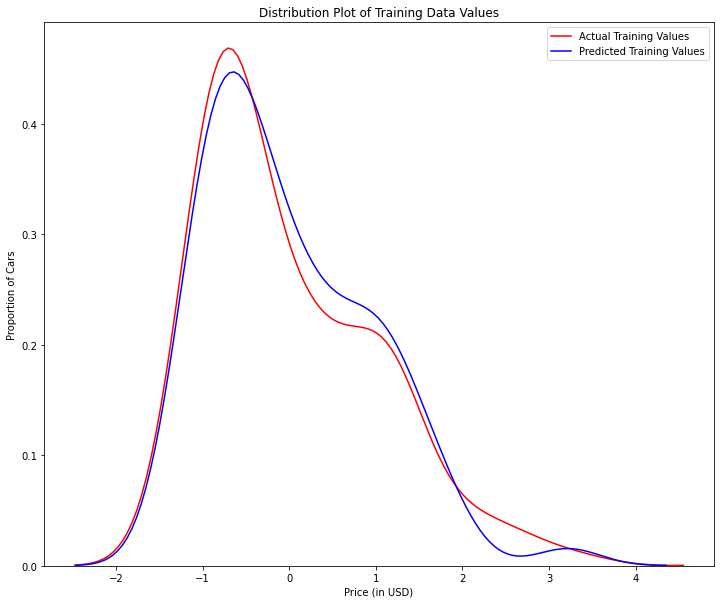

In [479]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

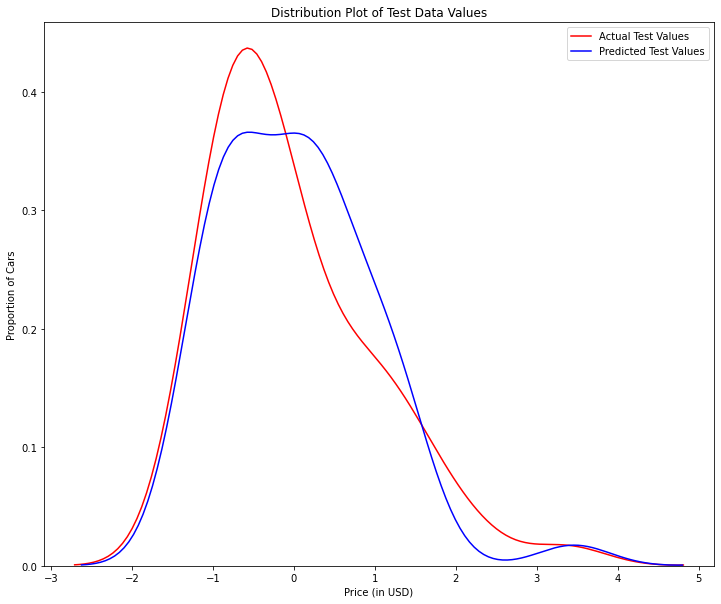

In [480]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [481]:
# Let's check the training group with statsmodel
X8 = x_train[MLR8]
Y8 = y_train
X8 = sm.add_constant(X8)
model8 = sm.OLS(Y8, X8).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     35.21
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           3.23e-16
Time:                        02:18:26   Log-Likelihood:                -20.215
No. Observations:                  51   AIC:                             58.43
Df Residuals:                      42   BIC:                             75.82
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.81

In [482]:
# Let's check the test group with statsmodel
X = x_test[MLR8]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     35.21
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           3.23e-16
Time:                        02:18:32   Log-Likelihood:                -20.215
No. Observations:                  51   AIC:                             58.43
Df Residuals:                      42   BIC:                             75.82
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.81

In [483]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.8372233021391469


From this model, we wind up with an R-squared value in the training group of 0.870, meaning 87% of the variance in the training data can be explained by the model. The test group's R-squared score was identical at 0.870. The model's overall R-squared score increased to 0.837. Graphically, the distribution plot for the predicted test data continues to slowly look more similar to the actual values.

We seem to have a good model. However, 'engine-type_ohc' has a p-value over 0.05, so we should remove it.

#### Model Attempt 9

In [493]:
# Create object for list of features
MLR9 = ['curb-weight', 'aspiration_std', 'drive-wheels_fwd', 
       'fuel-system_mpfi', 'make-quality_Budget', 'make-quality_Premium', 'num-of-cylinders_four']

# Fit the model to our training group
lr.fit(x_train[MLR9], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR9])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR9])

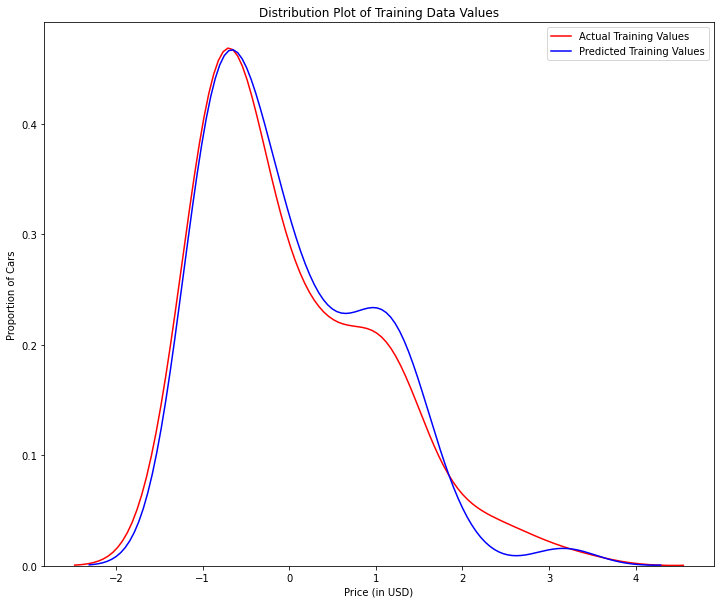

In [494]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

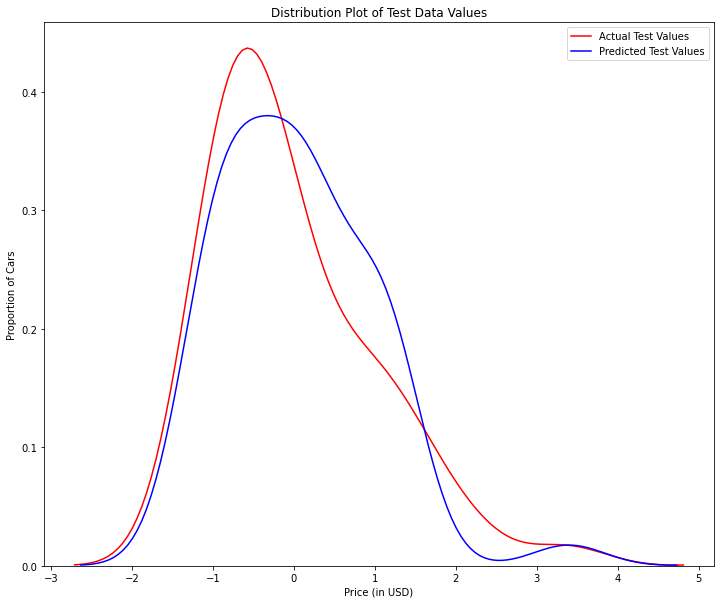

In [495]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [496]:
# Let's check the training group with statsmodel
X = x_train[MLR9]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     119.1
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           6.71e-53
Time:                        02:21:22   Log-Likelihood:                -55.930
No. Observations:                 136   AIC:                             127.9
Df Residuals:                     128   BIC:                             151.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.89

In [497]:
# Let's check the test group with statsmodel
X = x_test[MLR9]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     40.02
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           8.21e-17
Time:                        02:21:25   Log-Likelihood:                -20.860
No. Observations:                  51   AIC:                             57.72
Df Residuals:                      43   BIC:                             73.18
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.83

In [498]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.8475949241678625


From this model, we wind up with an R-squared value in the training group of 0.867, meaning 86.7% of the variance in the training data can be explained by the model. The test group's R-squared score is close at 0.867. The model's overall R-squared score increased to 0.848. Graphically, in our distribution plots, the predicted values are looking more similar to the actual values than they were previously. 

We seem to have a good model. None of our features has a p-value above 0.05, but in an effort to reduce cost, we will remove 'drive-wheels_fwd', which has the highest p-value.

#### Model Attempt 10

In [511]:
# Create object for list of features
MLR10 = ['curb-weight', 'aspiration_std', 'fuel-system_mpfi', 
       'make-quality_Budget', 'make-quality_Premium', 'num-of-cylinders_four']

# Fit the model to our training group
lr.fit(x_train[MLR10], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR10])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR10])

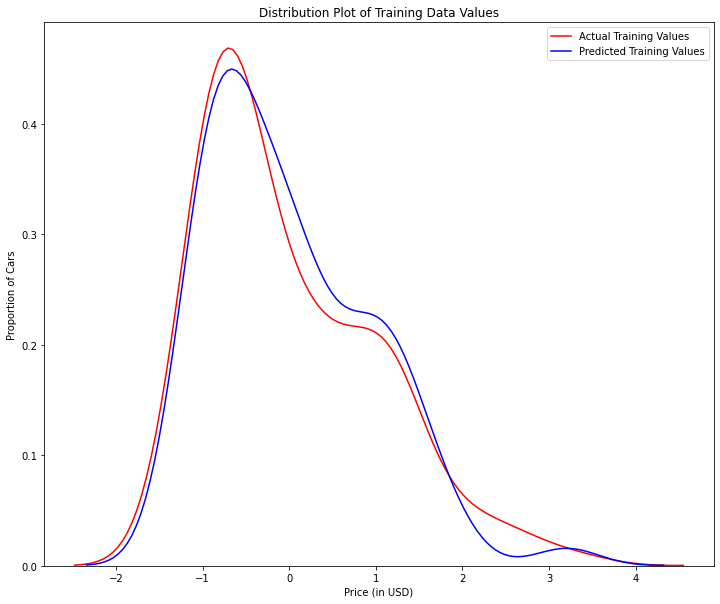

In [512]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

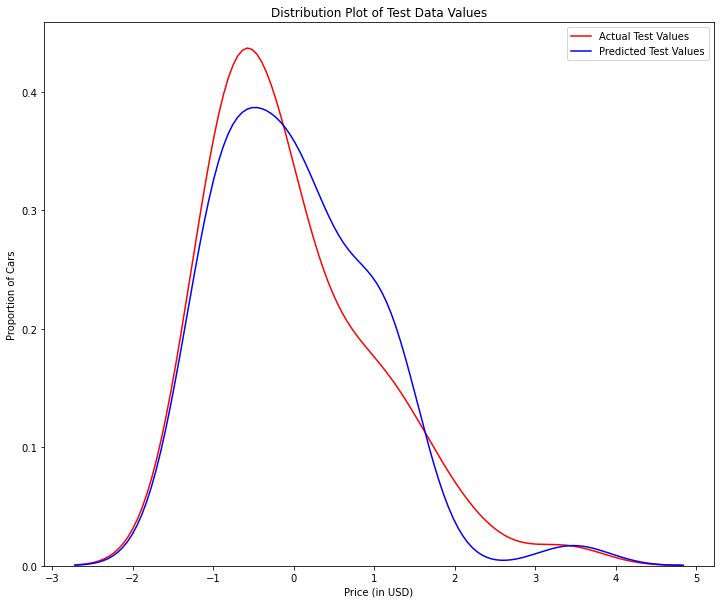

In [513]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [514]:
# Let's check the training group with statsmodel
X = x_train[MLR10]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     131.7
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.60e-52
Time:                        02:37:15   Log-Likelihood:                -59.518
No. Observations:                 136   AIC:                             133.0
Df Residuals:                     129   BIC:                             153.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.72

In [524]:
# Let's check the test group with statsmodel
X = x_test[MLR10]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     46.77
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.68e-17
Time:                        09:48:52   Log-Likelihood:                -21.330
No. Observations:                  51   AIC:                             56.66
Df Residuals:                      44   BIC:                             70.18
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.70

In [525]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.8509614766084429


From this model, we wind up with an R-squared value in the training group of 0.860, meaning 86% of the variance in the training data can be explained by the model. The test group's R-squared score is close at 0.864. The model's overall R-squared score increased to 0.851. Graphically, in our distribution plots, the predicted values are looking more similar to the actual values than they were previously. 

We seem to have a very strong model here, as the highest p-value among the remaining features is 0.001 and the Prob(F-statistic) is also extremely low.

Therefore, we will use this equation to determine the price of a vehicle:

<i><b>price</b> = 0.7246 + (0.4871 * curb-weight) - (0.3230 * aspiration_std) + (0.4062 * fuel-system_mpfi) - (0.3168 * make-quality_Budget) + (1.3541 * make-quality_Premium) - (0.5915 * num-of-cylinders_four)</i>

## Model Evaluation

#### Model 10 Evaluation

Now that we have developed and chosen a model, we should evaluate it. We will look at the R-squared of the model to determine to what degree the model explains the variance in the data. We will also look at the regression plot, residual plot, and a histogram of the errors of the model to see how accurate it was at predicting the price points in the test set.

In [526]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)
MSE = mean_squared_error(Y, Yhat_test)
print('The mean squared error of actual price and predicted price is:', MSE)

The R-squared is: 0.8509614766084429
The mean squared error of actual price and predicted price is: 0.1485974713475016


We see that 85.1% of the variance of the data is explained by our model. Moreover, our MSE is low at 0.149. Both of these metrics indicate a model that shows effectiveness without overfitting. Let's look more closely at how the model did with the test set.

Text(0.5, 1.0, 'Regression Plot of Predicted vs Actual Price in Test Group')

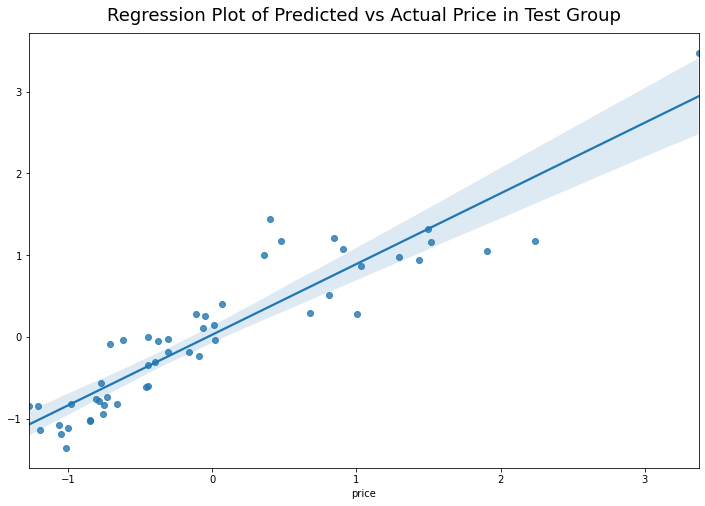

In [519]:
# Regression plot
plt.figure(figsize=(12,8))
regplot1 = sns.regplot(x = y_test, y = Yhat_test, data = df)
regplot1.set_title('Regression Plot of Predicted vs Actual Price in Test Group', fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'Residual Plot of Predicted Price vs Actual Price')

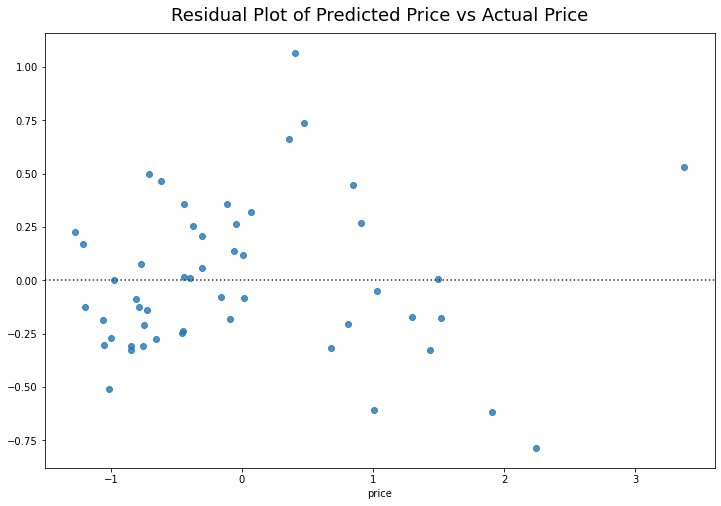

In [520]:
# Residual Plot
plt.figure(figsize=(12, 8))
resplot2 = sns.residplot(Y, Yhat_test, data = df)
resplot2.set_title('Residual Plot of Predicted Price vs Actual Price', fontdict={'fontsize':18}, pad=12)

In both of these graphs, the line is our predicted price in the test set, while the points are the actual price of the test set. The distance of each residual appears to be pretty random, which is a great sign. This means the model's prediction errors would seem to be pretty normally distributed. We can investigate this further with a histogram showing the frequency of the size of error between predicted and actual values.

Text(0.5, 0, 'Distance of error from actual value')

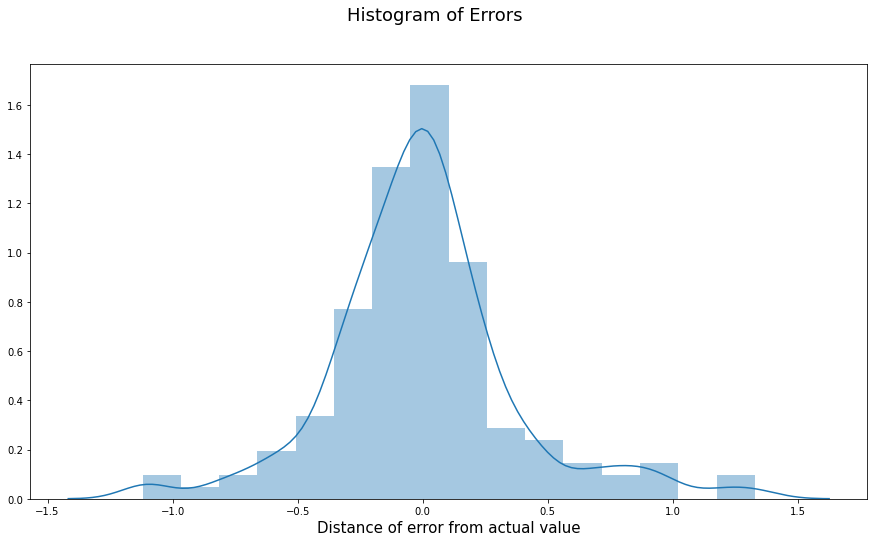

In [527]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - Yhat_train), bins = 16)
fig.suptitle('Histogram of Errors', fontsize = 18)                  
# Plot heading 
plt.xlabel('Distance of error from actual value', fontsize = 15)

The graph is pretty much normally distributed, which is great. This means that the model's prediction errors were often most often very small and were balanced between being too high and too low. So the model does not need to be further adjusted.

## Conclusions, Interpretation, and Limitations

In conclusion, we have developed a model for the leadership team that will account for 85.1% of data variance with a low mean squared error of 0.149 while maintaining that all of its included features are statistically significant. Moreover, it only uses six features, so its cost to calculate is low.

We should now return to our research questions to answer them:
* What features most significantly impact the price of a car in the US market?
    * The features are: 'curb-weight', 'aspiration_std', 'fuel-system_mpfi', 'make-quality_Budget', 'make-quality_Premium', and 'num-of-cylinders_four'
* From those given features, how specifically do they impact the price of a car?
    * The equation the startup company should use to calculate the price of a vehicle in the auto market is:

<div align="center"><i><b>price</b> = 0.7246 + (0.4871 * curb-weight) - (0.3230 * aspiration_std) + (0.4062 * fuel-system_mpfi) <br>- (0.3168 * make-quality_Budget) + (1.3541 * make-quality_Premium) - (0.5915 * num-of-cylinders_four)</i>

The startup's leadership team can make pricing decisions based on this model. If they determine their niche in the market is to be a budget, midrange, or premium brand, they can account for this in the model as well. Most importantly, this allows the startup to predict the expected price of their vehicles based on these features, which means they can determine what a safe build cost would be to increase their odds of profitability. 

### Limitations
One limitation is that we needed to impute the median value of stroke for four vehicles made by Mazda. It did not seem to effect the model, as stroke was not an included feature in the model's equation.

However, the main limitations are found in the dataset itself. Although the original dataset is over 200 vehicles, that isn't very large compared to the number of automobile models that are available in the US. Furthermore, there are some very popular US brands that are missing. Ford, Chrysler, Lincoln, Cadillac, and others are not included in the dataset. Having a more robust dataset would likely alter the model in ways that will benefit it, and by extension, the startup company. 